In [2]:
import pandas as pd
datos = pd.read_csv("housing.csv")

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

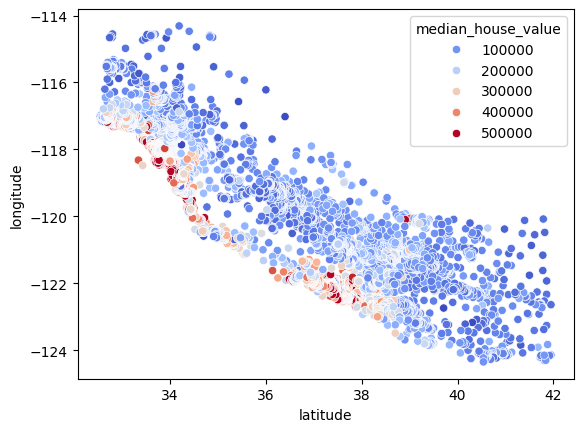

In [4]:
#grafca de mapa mediante cuant vale la casa
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

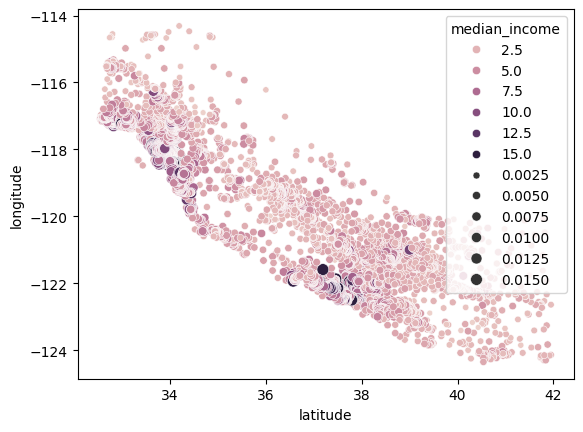

In [5]:
#grafca de mapa
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", 
               size=datos["median_income"]/1000)

In [6]:
datos.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [7]:
from sklearn.cluster import KMeans

x = datos.loc[:, ["latitude", "longitude", "median_income"]]
modelo = KMeans(n_clusters=3)

#n_clusters=3 ---- 3 grupos
predicciones=modelo.fit_predict(x)

#esto ya no devuelve las predicciones

c:\Users\Miguel Angel\Desktop\TODO\PROGRAMACION\PROYECTOS EN GIT HUB\MACHINE_LEARNING\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
predicciones.shape # node deberia decir en que nivel socioeconomico queda...


(20640,)

In [9]:
x["segmento_economico"] = predicciones # agregar el estrato socioeconomico

In [10]:
pd.DataFrame(x)

,latitude,longitude,median_income,segmento_economico
0,37.88,-122.23,8.3252,0
1,37.86,-122.22,8.3014,0
2,37.85,-122.24,7.2574,0
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,0
...,...,...,...,...
20635,39.48,-121.09,1.5603,0
20636,39.49,-121.21,2.5568,0
20637,39.43,-121.22,1.7000,0
20638,39.43,-121.32,1.8672,0


In [11]:
x["segmento_economico"].value_counts()

segmento_economico
1    9393
0    8457
2    2790
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

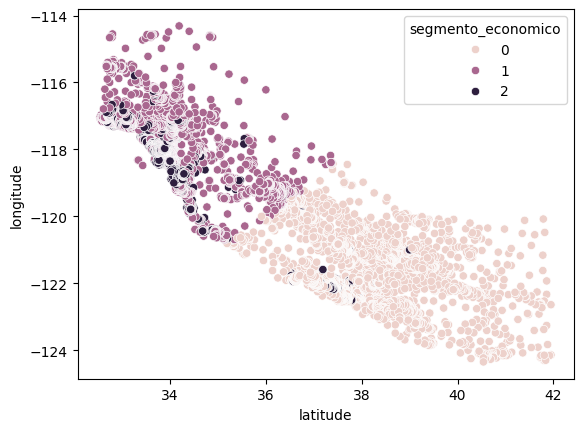

In [12]:
sb.scatterplot(x="latitude", y="longitude", data=x, hue="segmento_economico")

In [13]:
modelo = KMeans(n_clusters=6)

#n_clusters=3 ---- 3 grupos
predicciones=modelo.fit_predict(x)
x["segmento_economico"] = predicciones # agregar el estrato socioeconomico

c:\Users\Miguel Angel\Desktop\TODO\PROGRAMACION\PROYECTOS EN GIT HUB\MACHINE_LEARNING\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='latitude', ylabel='longitude'>

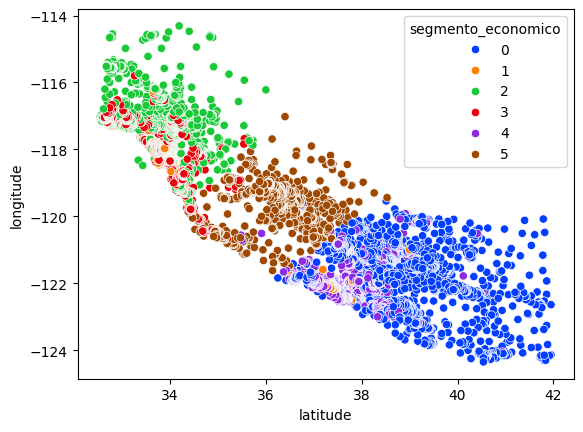

In [14]:
#neuva grafica ocn 6 estratos
sb.scatterplot(x="latitude", y="longitude", data=x, hue="segmento_economico", palette="bright")

In [15]:
x["segmento_economico"].value_counts()

segmento_economico
2    7513
0    4859
3    3394
4    2792
5    1654
1     428
Name: count, dtype: int64

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_16200\430189278.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="segmento_economico", data=x, palette="bright")


<Axes: xlabel='segmento_economico', ylabel='count'>

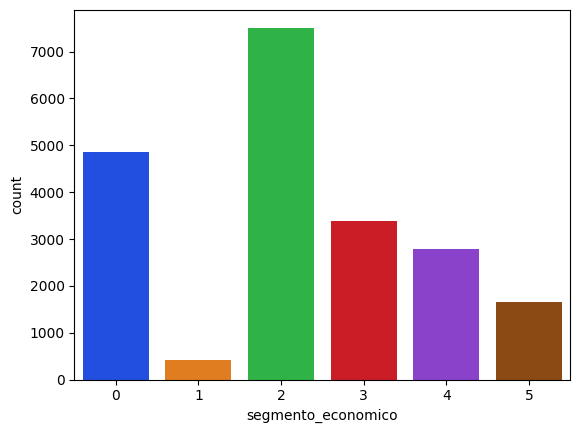

In [16]:
sb.countplot(x="segmento_economico", data=x, palette="bright")

In [17]:
x.groupby(["segmento_economico"])["median_income"].mean() #que me calclelos ingresos medios

segmento_economico
0     2.813826
1    11.125250
2     2.968195
3     5.728200
4     5.491201
5     2.650345
Name: median_income, dtype: float64